In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('/home/vinod/Downloads/credit-card-default.csv')

In [3]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')

# The data divided into train and test

In [7]:
X=df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [8]:
y=df['defaulted']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Import the simpleimputer and decisionclassifier and makepipeline

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [11]:
sm=SimpleImputer()
dt=DecisionTreeClassifier(random_state=1)

In [12]:
pipline=make_pipeline(sm,dt)

In [13]:
pipline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [14]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [15]:
pipline.score(X_test,y_test)

0.7173333333333334

In [16]:
pipline.score(X_train,y_train)

1.0

# import the baggingclassifier

In [17]:
from sklearn.ensemble import BaggingClassifier

In [18]:
bgclassifier =BaggingClassifier(base_estimator=pipline,random_state=1)

In [19]:
bgclassifier.fit(X_train,y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('decisiontreeclassifier',
                                                  DecisionTreeClassifier(random_state=1))]),
                  random_state=1)

# Checking the  train and test model score

In [20]:
bgclassifier.score(X_train,y_train)

0.9819523809523809

In [21]:
bgclassifier.score(X_test,y_test)

0.8021111111111111

# import the gridsearchcv model with given parameters

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
rfc=GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=1),param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],'max_features': [1, 5, 10, 15, 20],'max_samples': [0.05, 0.1, 0.2, 0.5]},scoring='accuracy')


In [24]:
rfc.fit(X_train,y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

# Print the best Parameters 

In [25]:
rfc.best_params_

{'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 0.5}

In [26]:
y_pred=rfc.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(accuracy_score(y_test,y_pred))

0.82


In [29]:
bgclassifier=BaggingClassifier(base_estimator=rfc,random_state=1)

In [30]:
bgclassifier.fit(X_train,y_train)

BaggingClassifier(base_estimator=GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                                          random_state=1),
                                              param_grid={'base_estimator__max_depth': [1,
                                                                                        5,
                                                                                        10,
                                                                                        15,
                                                                                        20],
                                                          'max_features': [1, 5,
                                                                           10,
                                                                           15,
                                                                           20],
                

# Testing the model score for test and train score

In [31]:
bgclassifier.score(X_test,y_test)

0.8193333333333334

In [32]:
bgclassifier.score(X_train,y_train)

0.9014285714285715

# Import the model Randomforestclassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(random_state=1)

In [35]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [36]:
prediction=rf.predict(X_test)

# Print the confusion matrix and classification report

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.66      0.37      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [39]:
print(confusion_matrix(y_test,prediction))

[[6608  374]
 [1276  742]]


In [40]:
print(accuracy_score(y_test,prediction))

0.8166666666666667


# Import the Kfold model and checking the test and train model score

In [41]:
from sklearn.model_selection import KFold

In [42]:
rf=GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,scoring='accuracy')

In [43]:
rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [44]:
score=pd.DataFrame(rf.cv_results_)

In [45]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.631418,0.006713,0.021018,0.000088,2,{'max_depth': 2},0.801190,0.801190,0.800714,0.800952,...,0.801048,0.000190,4,0.802202,0.801607,0.801607,0.801905,0.801548,0.801774,0.000248
1,1.598406,0.009020,0.033472,0.000384,7,{'max_depth': 7},0.824286,0.820952,0.822143,0.821429,...,0.821190,0.002323,1,0.833571,0.835417,0.835893,0.833393,0.836964,0.835048,0.001374
2,2.532426,0.183612,0.052271,0.000709,12,{'max_depth': 12},0.823095,0.821905,0.821905,0.820238,...,0.821095,0.001654,2,0.885476,0.886131,0.889643,0.886786,0.884702,0.886548,0.001695
3,3.605774,0.014177,0.070796,0.000382,17,{'max_depth': 17},0.826190,0.821429,0.821190,0.817143,...,0.819714,0.004561,3,0.928631,0.926845,0.929405,0.927857,0.928155,0.928179,0.000847


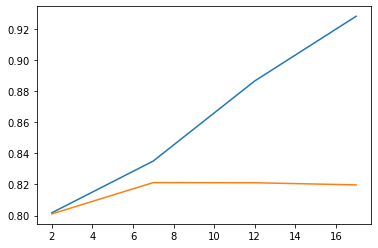

In [46]:
plt.figure()
max_depth =range(2, 20, 5)
plt.plot(max_depth,score['mean_train_score'])
plt.plot(max_depth,score['mean_test_score'])
plt.show()


In [47]:
rf=GridSearchCV(cv=5,estimator=RandomForestClassifier(max_depth=4, random_state=1),param_grid={'n_estimators': range(100, 1500, 400)},return_train_score=True, scoring='accuracy')

In [48]:
rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [49]:
score=pd.DataFrame(rf.cv_results_)

In [50]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.042467,0.012059,0.025890,0.000143,100,{'n_estimators': 100},0.810476,0.815000,0.812857,0.814048,...,0.812810,0.001618,1,0.814405,0.814940,0.815060,0.813155,0.814643,0.814440,0.000682
1,5.346584,0.263189,0.122999,0.002825,500,{'n_estimators': 500},0.809286,0.814286,0.811905,0.814762,...,0.812429,0.001966,2,0.813929,0.813690,0.813393,0.812857,0.813869,0.813548,0.000392
2,9.391673,0.015913,0.215459,0.000593,900,{'n_estimators': 900},0.809286,0.814762,0.811429,0.813810,...,0.812238,0.001914,3,0.813393,0.813929,0.813393,0.812440,0.813452,0.813321,0.000484
3,13.554433,0.074102,0.311674,0.001050,1300,{'n_estimators': 1300},0.808571,0.814762,0.811429,0.813571,...,0.812000,0.002111,4,0.813274,0.813869,0.813631,0.812143,0.813929,0.813369,0.000655


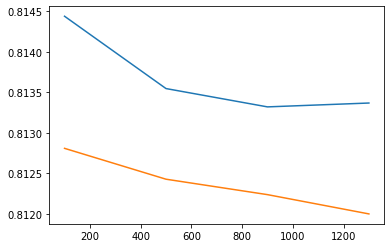

In [51]:
plt.figure()
n_estimators= range(100, 1500, 400)
plt.plot(n_estimators,score['mean_train_score'])
plt.plot(n_estimators,score['mean_test_score'])
plt.show()


In [52]:
rf=GridSearchCV(cv=5,estimator=RandomForestClassifier(max_depth=4, random_state=1),param_grid={'max_features': [4, 8, 14, 20, 24]},return_train_score=True, scoring='accuracy')

In [53]:
rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [54]:
score=pd.DataFrame(rf.cv_results_)

In [55]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.043158,0.010834,0.025630,0.000034,4,{'max_features': 4},0.810476,0.815000,0.812857,0.814048,...,0.812810,0.001618,5,0.814405,0.814940,0.815060,0.813155,0.814643,0.814440,0.000682
1,1.817756,0.012204,0.025379,0.000096,8,{'max_features': 8},0.821429,0.822143,0.820952,0.823810,...,0.821381,0.001706,3,0.824345,0.824048,0.824048,0.822679,0.824940,0.824012,0.000742
2,3.028015,0.007249,0.025224,0.000134,14,{'max_features': 14},0.822857,0.820476,0.818571,0.824524,...,0.821000,0.002364,4,0.824643,0.823631,0.823810,0.823274,0.825476,0.824167,0.000794
3,4.556439,0.274645,0.025842,0.000520,20,{'max_features': 20},0.823333,0.822857,0.820238,0.825238,...,0.822048,0.002360,2,0.825000,0.825119,0.825595,0.824405,0.825595,0.825143,0.000442
4,5.753573,0.023773,0.026162,0.000115,24,{'max_features': 24},0.823333,0.823333,0.821190,0.826190,...,0.822571,0.002462,1,0.825417,0.825476,0.825952,0.824524,0.826310,0.825536,0.000602


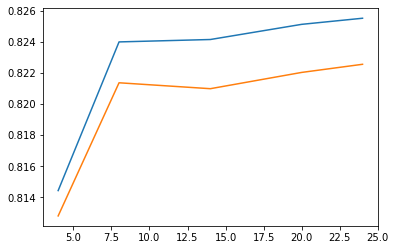

In [56]:
plt.figure()
max_features= [4, 8, 14, 20, 24]
plt.plot(max_features,score['mean_train_score'])
plt.plot(max_features,score['mean_test_score'])
plt.show()

In [57]:
rf=GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),param_grid={'min_samples_leaf': range(100, 400, 50)},return_train_score=True, scoring='accuracy')

In [58]:
rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [59]:
score=pd.DataFrame(rf.cv_results_)

In [60]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.986363,0.039614,0.043971,0.000070,100,{'min_samples_leaf': 100},0.818333,0.819524,0.812857,0.820000,...,0.817333,0.002640,1,0.819762,0.820179,0.819464,0.821012,0.820417,0.820167,0.000536
1,1.880680,0.045419,0.042396,0.002408,150,{'min_samples_leaf': 150},0.808571,0.813571,0.812381,0.813571,...,0.812476,0.002046,2,0.813393,0.813036,0.816369,0.812321,0.818452,0.814714,0.002324
2,1.696867,0.018691,0.039117,0.001342,200,{'min_samples_leaf': 200},0.808333,0.812143,0.810476,0.813333,...,0.811143,0.001686,3,0.812083,0.810238,0.811607,0.809821,0.811429,0.811036,0.000859
3,1.627109,0.045544,0.038544,0.000968,250,{'min_samples_leaf': 250},0.807619,0.810952,0.810000,0.812619,...,0.810429,0.001639,4,0.812500,0.811131,0.811726,0.811369,0.811131,0.811571,0.000513
4,1.651069,0.105790,0.036569,0.000735,300,{'min_samples_leaf': 300},0.805238,0.812143,0.809048,0.810952,...,0.809524,0.002367,5,0.812083,0.811131,0.810060,0.809048,0.809583,0.810381,0.001093
5,1.475858,0.036046,0.036152,0.001013,350,{'min_samples_leaf': 350},0.805714,0.809524,0.808810,0.806905,...,0.807905,0.001392,6,0.810536,0.808929,0.808452,0.806607,0.808810,0.808667,0.001255


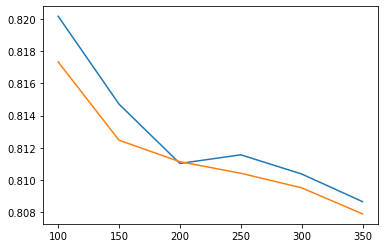

In [61]:
plt.figure()
min_samples_leaf= range(100, 400, 50)
plt.plot(min_samples_leaf,score['mean_train_score'])
plt.plot(min_samples_leaf,score['mean_test_score'])
plt.show()

In [62]:
rf=GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),param_grid={'min_samples_split': range(200, 500, 50)},return_train_score=True, scoring='accuracy')



In [63]:
rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [64]:
score=pd.DataFrame(rf.cv_results_)

In [65]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.686500,0.048924,0.053161,0.001229,200,{'min_samples_split': 200},0.824048,0.823810,0.819762,0.824286,...,0.821762,0.002945,1,0.824881,0.826488,0.826250,0.825357,0.827321,0.826060,0.000860
1,2.520125,0.024780,0.049166,0.000383,250,{'min_samples_split': 250},0.822857,0.824048,0.820238,0.824524,...,0.821667,0.002908,2,0.824167,0.825179,0.824940,0.824048,0.826429,0.824952,0.000856
2,2.441675,0.031152,0.046606,0.000319,300,{'min_samples_split': 300},0.822381,0.822857,0.820476,0.824048,...,0.821286,0.002580,3,0.823393,0.824167,0.824405,0.823214,0.825060,0.824048,0.000677
3,2.633618,0.195236,0.047027,0.000961,350,{'min_samples_split': 350},0.821905,0.822857,0.820714,0.822619,...,0.821048,0.002090,5,0.822679,0.823571,0.823571,0.822619,0.824583,0.823405,0.000720
4,2.724467,0.051795,0.046406,0.001387,400,{'min_samples_split': 400},0.820714,0.822857,0.819762,0.822857,...,0.820571,0.002297,6,0.822560,0.822083,0.823036,0.821905,0.823095,0.822536,0.000483
5,2.469519,0.220138,0.043481,0.000958,450,{'min_samples_split': 450},0.821667,0.823571,0.819286,0.823571,...,0.821143,0.002364,4,0.821905,0.821845,0.822976,0.821131,0.822976,0.822167,0.000715


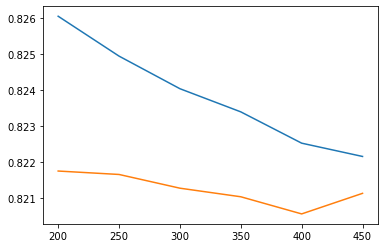

In [66]:
plt.figure()
min_samples_split=range(200, 500, 50)
plt.plot(min_samples_split,score['mean_train_score'])
plt.plot(min_samples_split,score['mean_test_score'])
plt.show()

# Import Randomizedsearchcv model with randomforsetclassfier hyperperameters

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rs=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),param_distributions={'max_depth': [4, 8, 10],'max_features': [5, 10],'min_samples_leaf': range(100, 400, 200),'min_samples_split': range(200, 500, 200),'n_estimators': [100, 200, 300]},random_state=1)

In [69]:
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [70]:
prediction=rs.predict(X_test)

In [71]:
rs.best_params_

{'n_estimators': 300,
 'min_samples_split': 400,
 'min_samples_leaf': 100,
 'max_features': 5,
 'max_depth': 10}

In [72]:
print('Model accuracy socre is {:.4f}'.format(accuracy_score(y_test,prediction)))

Model accuracy socre is 0.8199


In [73]:
rfc=RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=100,min_samples_split=200, n_estimators=300, random_state=1)

In [74]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300, random_state=1)

In [75]:
prediction=rfc.predict(X_test)

# print the classification report and confusion matrix

In [76]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6982
           1       0.69      0.35      0.46      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [77]:
print(confusion_matrix(y_test,prediction))

[[6668  314]
 [1314  704]]


In [78]:
print('The accuracy socre is {:.4f}'.format(accuracy_score(y_test,prediction)))

The accuracy socre is 0.8191


# import  Extratreesclassifier model and find the prediction model score in test and train set

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

In [80]:
et=ExtraTreesClassifier(random_state=1)

In [81]:
et.fit(X_train,y_train)

ExtraTreesClassifier(random_state=1)

In [82]:
prediction=et.predict(X_test)

In [83]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.66      0.36      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000



In [84]:
print(confusion_matrix(y_test,prediction))

[[6606  376]
 [1284  734]]


In [85]:
print('The accuracy socre is {:.4f}'.format(accuracy_score(y_test,prediction)))

The accuracy socre is 0.8156


In [86]:
rs.best_params_

{'n_estimators': 300,
 'min_samples_split': 400,
 'min_samples_leaf': 100,
 'max_features': 5,
 'max_depth': 10}

In [87]:
rt=ExtraTreesClassifier(max_depth=10, max_features=10, min_samples_leaf=300, min_samples_split=400, n_estimators=300, random_state=1)

In [88]:
rt.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=10, max_features=10, min_samples_leaf=300,
                     min_samples_split=400, n_estimators=300, random_state=1)

In [89]:
prediction=rs.predict(X_test)

# Print the accuracy_score of the extratreeclassifier

In [90]:
print(accuracy_score(y_test,prediction))

0.8198888888888889
